In [1]:
%load_ext autoreload
%autoreload 2
import constrained as cd
from constrained.constraints import inset, aligned_vertically, distributed_vertically, aligned_horizontally, distributed_horizontally

In [2]:
import constrained.z3solver as z3solver
import constrained.ast as ast
import importlib
importlib.reload(z3solver)
importlib.reload(ast)
from functools import wraps

def element(func):
    @wraps(func)
    def element_wrapper(*args, **kwargs):
        original_defaults = func.__defaults__
        if func.__defaults__ is not None:
            defaults = []
            for default in func.__defaults__:
                if isinstance(default, ast.Placeholder):
                    defaults.append(ast.Variable())
                else:
                    defaults.append(default)
            func.__defaults__ = tuple(defaults)
        #args = [arg + 1 if isinstance(arg, Real) else arg for arg in args]
        #kwargs = dict([(name, val + 1) if isinstance(val, Real) else (name, val) for (name, val) in kwargs.items()])
        return_value = func(*args, **kwargs)
        func.__defaults__ = original_defaults
        return return_value
    return element_wrapper

@element
def foo(a=ast.Var, **kwargs):
    print(a)
    x = kwargs.get("x", ast.Var).var()
    print(x == 1)
    print(x == 2)

foo(ast.Variable())

ImportError: cannot import name 'Variable' from 'constrained.ast' (g:\CS\Private_Projects\constrained\constrained\ast.py)

Solved 16 constraints in 0.015s


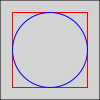

In [13]:
from constrained.constraints import aligned_vertically, aligned_horizontally
from constrained.primitive import Rect, Circle, Group
from constrained.core import Canvas, Style
from constrained import solve

rect = Rect(width=75, height=75, style=Style(outline="red", fill="lightgrey"))
circle = Circle(style=Style(outline="blue", fill="lightgrey"))
bg = Rect(top_left=(0, 0), width=100, height=100, style=Style(fill="lightgrey"))
group = Group([bg, rect, circle], [
    aligned_vertically([rect, circle]),
    aligned_horizontally([rect, circle]),
    rect.bounds.width == 2 * circle.radius,
    bg.bounds.center == rect.bounds.center
])
canvas = Canvas(100, 100, group)
solve(canvas).svg